# Library

In [1]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 47.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 75.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 27.9 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=9b3dc879f03c125ac06045e001b142713f000adf6f812ba7cf76749497374037
  Stored in directory: /root/.cache/pip/wheels/e6/8e/67/e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Library to dataset
import opendatasets as od
import os
import zipfile
import numpy as np

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet121
# Others
import shutil
import random

# Load dataset

In [4]:
# Download dataset
od.download('https://www.kaggle.com/datasets/ahmadhabibhasanzein/peach-leaves')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ahmadhabibhasanzein


Your Kaggle Key:

  ········


100%|██████████| 59.6M/59.6M [00:01<00:00, 34.1MB/s]


In [5]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "peach-leaves/Peach/train",
    label_mode="categorical",
    class_names=['Peach___Bacterial_spot','Peach___healthy'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "peach-leaves/Peach/valid",
    label_mode="categorical",
    class_names=['Peach___Bacterial_spot','Peach___healthy'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

==========================Training Data====================
Found 3566 files belonging to 2 classes.
==========================Validation Data====================
Found 891 files belonging to 2 classes.


In [6]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("peach-leaves/Peach/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("peach-leaves/Peach/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 3566 images belonging to 2 classes.
Found 891 images belonging to 2 classes.


# List Resource

In [7]:
# Check GPU
!nvidia-smi

Thu May 25 06:06:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
|  0%   55C    P2   115W / 350W |  10509MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
# Lis physical devices
devices = tf.config.experimental.list_physical_devices("GPU")
devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# Define the GPU strategy
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0"])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# Modelling Without Augmentation

## DenseNet Model 1

In [10]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Peach_DenseNet_model1_Based_Non_Augmented", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [11]:
# Define DIY Model
DenseNet_model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(2, activation='softmax') 
  ])


# Compile Model
DenseNet_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet_model.summary()

29084464/29084464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d (Globa  (None, 1024)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 7,300,418
Trainable params: 7,216,770
Non-t

In [12]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet_model_1 = DenseNet_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
179/179 [==============================] - ETA: 0s - loss: 0.2511 - accuracy: 0.9579
Epoch 1: val_accuracy improved from -inf to 0.96184, saving model to Peach_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


179/179 [==============================] - 94s 278ms/step - loss: 0.2511 - accuracy: 0.9579 - val_loss: 0.2290 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9941
Epoch 2: val_accuracy improved from 0.96184 to 0.99663, saving model to Peach_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


179/179 [==============================] - 43s 241ms/step - loss: 0.0251 - accuracy: 0.9941 - val_loss: 0.0171 - val_accuracy: 0.9966 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9792
Epoch 3: val_accuracy did not improve from 0.99663
179/179 [==============================] - 12s 69ms/step - loss: 0.0750 - accuracy: 0.9792 - val_loss: 1.6072 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9938
Epoch 4: val_accuracy improved from 0.99663 to 0.99776, saving model to Peach_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


179/179 [==============================] - 43s 241ms/step - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.0082 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9952
Epoch 5: val_accuracy did not improve from 0.99776
179/179 [==============================] - 12s 69ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.5098 - val_accuracy: 0.9562 - lr: 0.0010
Epoch 6/100
179/179 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9818
Epoch 6: val_accuracy did not improve from 0.99776
179/179 [==============================] - 13s 70ms/step - loss: 0.0766 - accuracy: 0.9818 - val_loss: 0.0585 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 7/100
179/179 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9815
Epoch 7: val_accuracy did not improve from 0.99776
179/179 [==============================] - 13s 70ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.0145 - val_a

INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model1_Based_Non_Augmented/assets


179/179 [==============================] - 44s 244ms/step - loss: 0.0066 - accuracy: 0.9969 - val_loss: 0.0034 - val_accuracy: 0.9989 - lr: 1.0000e-04
Epoch 13/100
179/179 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 13: val_accuracy did not improve from 0.99888
179/179 [==============================] - 12s 69ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9989 - lr: 1.0000e-04
Epoch 14/100
179/179 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9989
Epoch 14: val_accuracy did not improve from 0.99888
179/179 [==============================] - 12s 70ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0056 - val_accuracy: 0.9966 - lr: 1.0000e-04
Epoch 15/100
179/179 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9986
Epoch 15: val_accuracy did not improve from 0.99888
179/179 [==============================] - 13s 70ms/step - loss: 0.0043 - accuracy: 0.9986 - val_lo

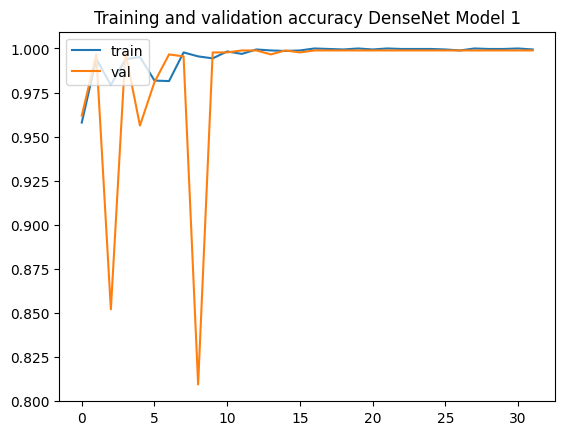

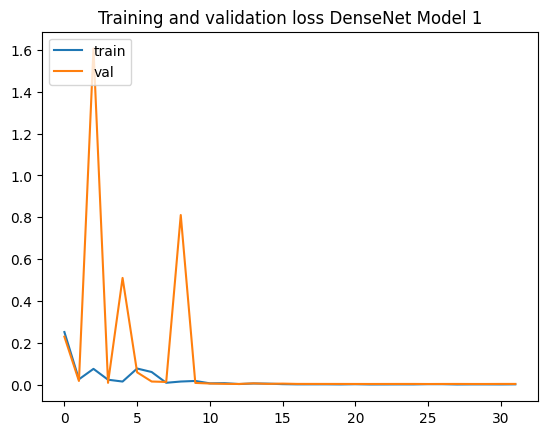

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet_model_1.history['accuracy' ]
val_acc  = history_DenseNet_model_1.history['val_accuracy' ]
loss     = history_DenseNet_model_1.history['loss' ]
val_loss = history_DenseNet_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model 1')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model 1')
plt.legend(['train', 'val'], loc='upper left')

## DenseNet Model 2

In [14]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Peach_DenseNet_model2_Based_Non_Augmented", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [15]:
# Define DIY Model
DenseNet_model_2 = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(2, activation='softmax') 
  ])


# Compile Model
DenseNet_model_2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 7,300,418
Trainable params: 7,216,770
Non-trainable params: 83,648
_______________________________________

In [16]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet_model_2 = DenseNet_model_2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
179/179 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.9675
Epoch 1: val_accuracy improved from -inf to 0.76094, saving model to Peach_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


179/179 [==============================] - 83s 265ms/step - loss: 0.0942 - accuracy: 0.9675 - val_loss: 1.1271 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9877
Epoch 2: val_accuracy improved from 0.76094 to 0.93603, saving model to Peach_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


179/179 [==============================] - 44s 245ms/step - loss: 0.0489 - accuracy: 0.9877 - val_loss: 0.1492 - val_accuracy: 0.9360 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9910
Epoch 3: val_accuracy improved from 0.93603 to 0.97531, saving model to Peach_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


179/179 [==============================] - 44s 245ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9899
Epoch 4: val_accuracy improved from 0.97531 to 0.98990, saving model to Peach_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


179/179 [==============================] - 44s 248ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0316 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9896
Epoch 5: val_accuracy improved from 0.98990 to 0.99888, saving model to Peach_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


179/179 [==============================] - 44s 247ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0100 - val_accuracy: 0.9989 - lr: 0.0010
Epoch 6/100
178/179 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9949
Epoch 6: val_accuracy did not improve from 0.99888
179/179 [==============================] - 13s 70ms/step - loss: 0.0110 - accuracy: 0.9950 - val_loss: 0.0130 - val_accuracy: 0.9955 - lr: 0.0010
Epoch 7/100
179/179 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9924
Epoch 7: val_accuracy did not improve from 0.99888
179/179 [==============================] - 13s 71ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.0056 - val_accuracy: 0.9989 - lr: 0.0010
Epoch 8/100
179/179 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9975
Epoch 8: val_accuracy did not improve from 0.99888
179/179 [==============================] - 13s 71ms/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0332 - val_a

INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Peach_DenseNet_model2_Based_Non_Augmented/assets


179/179 [==============================] - 44s 249ms/step - loss: 0.0110 - accuracy: 0.9955 - val_loss: 0.0025 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 11/100
179/179 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9989
Epoch 11: val_accuracy did not improve from 1.00000
179/179 [==============================] - 13s 70ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9989 - lr: 0.0010
Epoch 12/100
179/179 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9927
Epoch 12: val_accuracy did not improve from 1.00000
179/179 [==============================] - 13s 71ms/step - loss: 0.0173 - accuracy: 0.9927 - val_loss: 0.1486 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 13/100
179/179 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9916
Epoch 13: val_accuracy did not improve from 1.00000
179/179 [==============================] - 13s 71ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0695 -

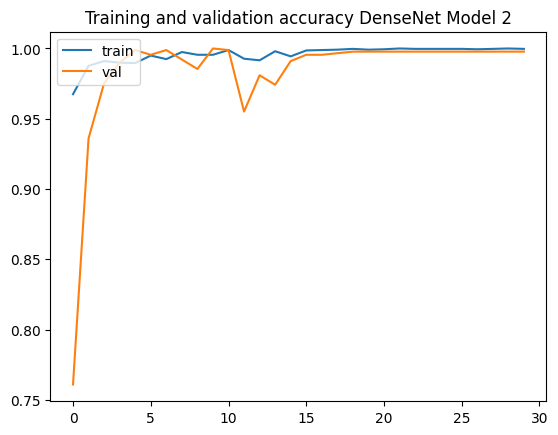

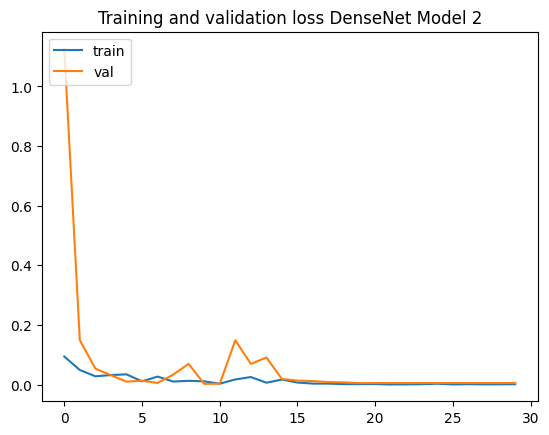

In [17]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet_model_2.history['accuracy' ]
val_acc  = history_DenseNet_model_2.history['val_accuracy' ]
loss     = history_DenseNet_model_2.history['loss' ]
val_loss = history_DenseNet_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')